### Test Experience 4 With Only Using Haralick Feature Extraction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
from hydra import initialize, compose
from omegaconf import OmegaConf

import warnings
warnings.filterwarnings('ignore')

with initialize(config_path="../config/"):
    data_cfg = compose(config_name="data_path")
data_cfg = OmegaConf.create(data_cfg)

### Config data path

In [2]:
# define path
HOME_PATH = "../"
DATA_PATH = data_cfg.data.leaf_tomato_disease_path

H5_TRAIN_DATA = data_cfg.data.haralick.features
H5_LABEL_DATA = data_cfg.data.haralick.labels
H5_LABEL_NAME = data_cfg.data.h5_label_names

BEST_MODEL_SMOTE_PATH = data_cfg.data.haralick.best_model_smote
REPORT_TRAINING_SMOTE_PATH = data_cfg.data.haralick.report_training_acc_smote

BEST_MODEL_NOT_SMOTE_PATH = data_cfg.data.haralick.best_model_not_smote
REPORT_TRAINING_NOT_SMOTE_PATH = data_cfg.data.haralick.report_training_acc_not_smote

COMPARE_METHOD_SMOTE_PATH = data_cfg.data.haralick.compare_method_smote
COMPARE_METHOD_NOT_SMOTE_PATH = data_cfg.data.haralick.compare_method_not_smote

# data
data_path = os.path.join(HOME_PATH, DATA_PATH)
feature_path = os.path.join(HOME_PATH, H5_TRAIN_DATA)
label_path = os.path.join(HOME_PATH, H5_LABEL_DATA)
label_name_path = os.path.join(HOME_PATH, H5_LABEL_NAME)

best_model_smote_path = os.path.join(HOME_PATH, BEST_MODEL_SMOTE_PATH)
best_model_not_smote_path = os.path.join(HOME_PATH, BEST_MODEL_NOT_SMOTE_PATH)
report_training_smote_path = os.path.join(HOME_PATH, REPORT_TRAINING_SMOTE_PATH)
report_training_not_smote_path = os.path.join(HOME_PATH, REPORT_TRAINING_NOT_SMOTE_PATH)
compare_method_smote_path = os.path.join(HOME_PATH, COMPARE_METHOD_SMOTE_PATH)
compare_method_not_smote_path = os.path.join(HOME_PATH, COMPARE_METHOD_NOT_SMOTE_PATH)

In [3]:
label_name_path

'../data/preprocess/label_names.npz'

### Image Remove Background

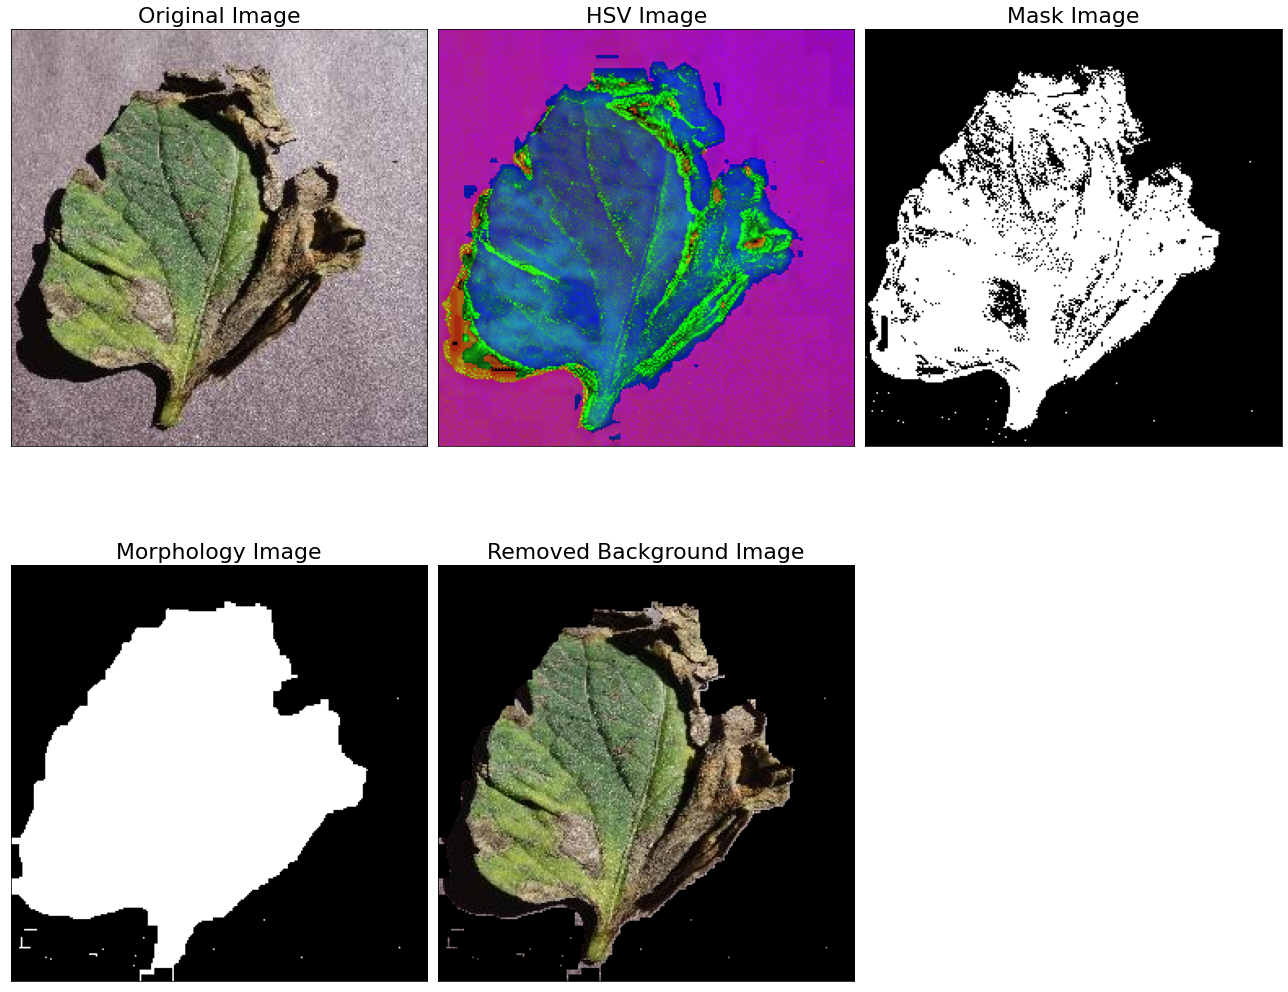

In [4]:
# create hsv
image = cv2.imread("../data/plantvillage/Early_blight/0208ed52-1b28-4c9c-88e3-4667581e1109___RS_Erly.B 7829.JPG")

# create hsv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# set lower and upper color limits
low_val = (0,60,0)
high_val = (179,255,255)
# Threshold the HSV image 
mask_1 = cv2.inRange(hsv, low_val,high_val)
# remove noise
mask = cv2.morphologyEx(mask_1, cv2.MORPH_CLOSE, kernel=np.ones((8,8),dtype=np.uint8))
# apply mask to original image
bg_remove_img = cv2.bitwise_and(image, image,mask=mask)

fig = plt.figure(figsize=(18, 15))
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(2, 3)

ax1.imshow(image[:, :, ::-1])
ax1.set_title("Original Image", fontsize=22)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2.imshow(hsv)
ax2.set_title("HSV Image", fontsize=22)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

ax3.imshow(mask_1, cmap="gray")
ax3.set_title("Mask Image", fontsize=22)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax4.imshow(mask, cmap="gray")
ax4.set_title("Morphology Image", fontsize=22)
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

ax5.imshow(bg_remove_img[:, :, ::-1])
ax5.set_title("Removed Background Image", fontsize=22)
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)

ax6.set_visible(False)

fig.tight_layout()
fig.subplots_adjust(hspace=0.025, wspace=0.025)

# plt.savefig("../images/preprocessing.png")
plt.show()

### Visual Testing Image

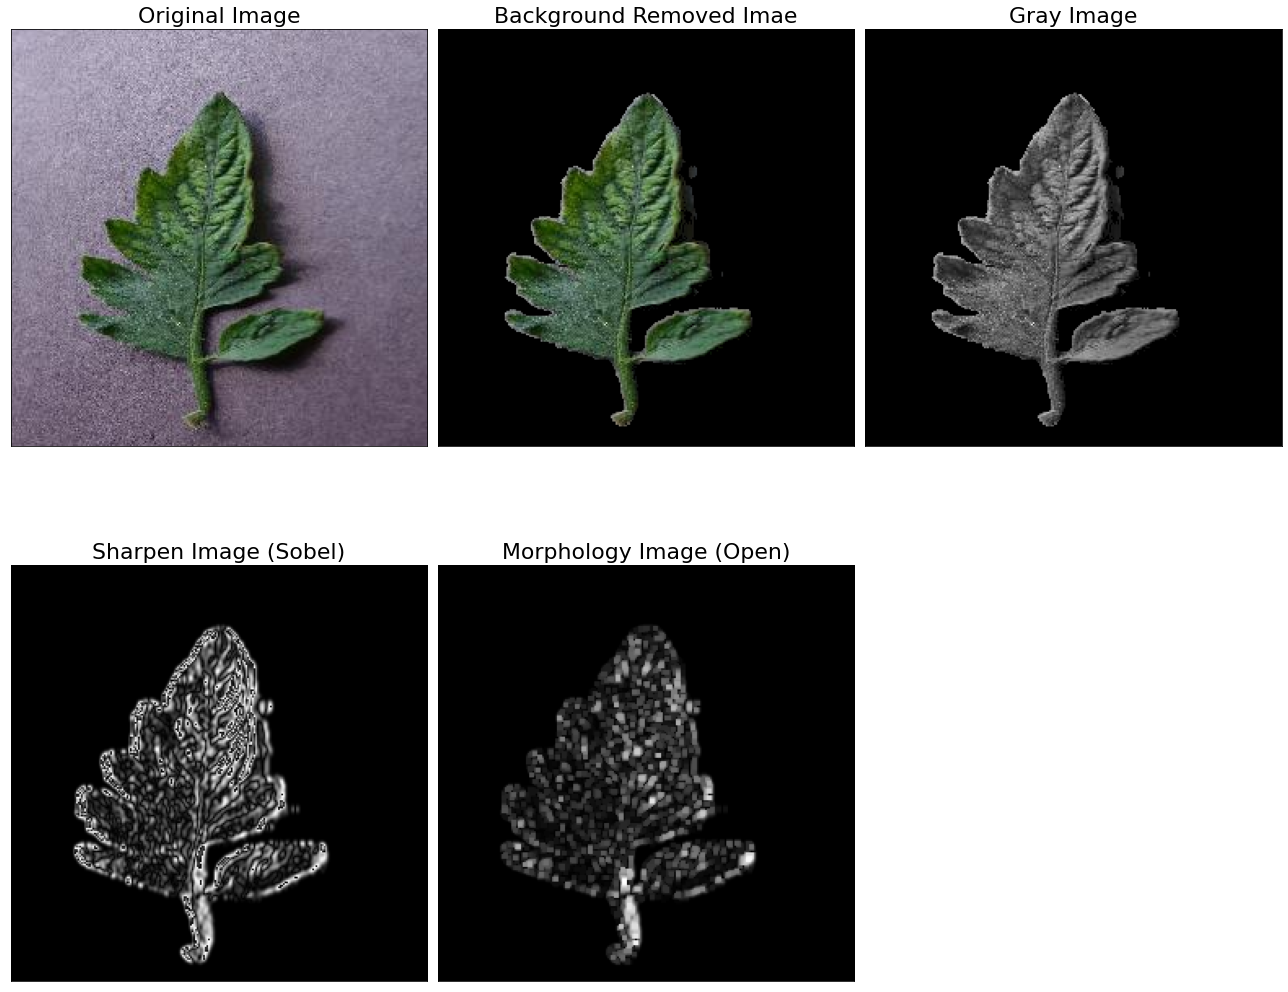

In [5]:
from image_processing import img_segmentation, sobel_edge_detection_2

image = cv2.imread("../data/plantvillage/Tomato_mosaic_virus/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG")

# Convert image to RGB and HSV
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
# => background removed image (image segmentation)
remove_background = img_segmentation(rgb_img, hsv_img)

# Convert to gray image
gray_img = cv2.cvtColor(remove_background, cv2.COLOR_RGB2GRAY)

# Sharpen Image (Sobel Filter)
sobel_img = sobel_edge_detection_2(gray_img)

# morphology image
kernel = np.ones((3,3),np.uint8)
MORPHOLOGY_IMG = cv2.morphologyEx(sobel_img, cv2.MORPH_OPEN, kernel)


fig = plt.figure(figsize=(18, 15))
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(2, 3)

# show original image
ax1.imshow(image[:, :, ::-1])
ax1.set_title("Original Image", fontsize=22)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

# show background removed image
ax2.imshow(remove_background)
ax2.set_title("Background Removed Imae", fontsize=22)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

# show gray image
ax3.imshow(gray_img, cmap="gray")
ax3.set_title("Gray Image", fontsize=22)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

# show sobel image
ax4.imshow(sobel_img, cmap="gray")
ax4.set_title("Sharpen Image (Sobel)", fontsize=22)
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

# show morphology image
ax5.imshow(MORPHOLOGY_IMG, cmap="gray")
ax5.set_title("Morphology Image (Open)", fontsize=22)
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)

ax6.set_visible(False)

fig.tight_layout()
fig.subplots_adjust(hspace=0.025, wspace=0.025)

# plt.savefig("../images/preprocessing.png")
plt.show()

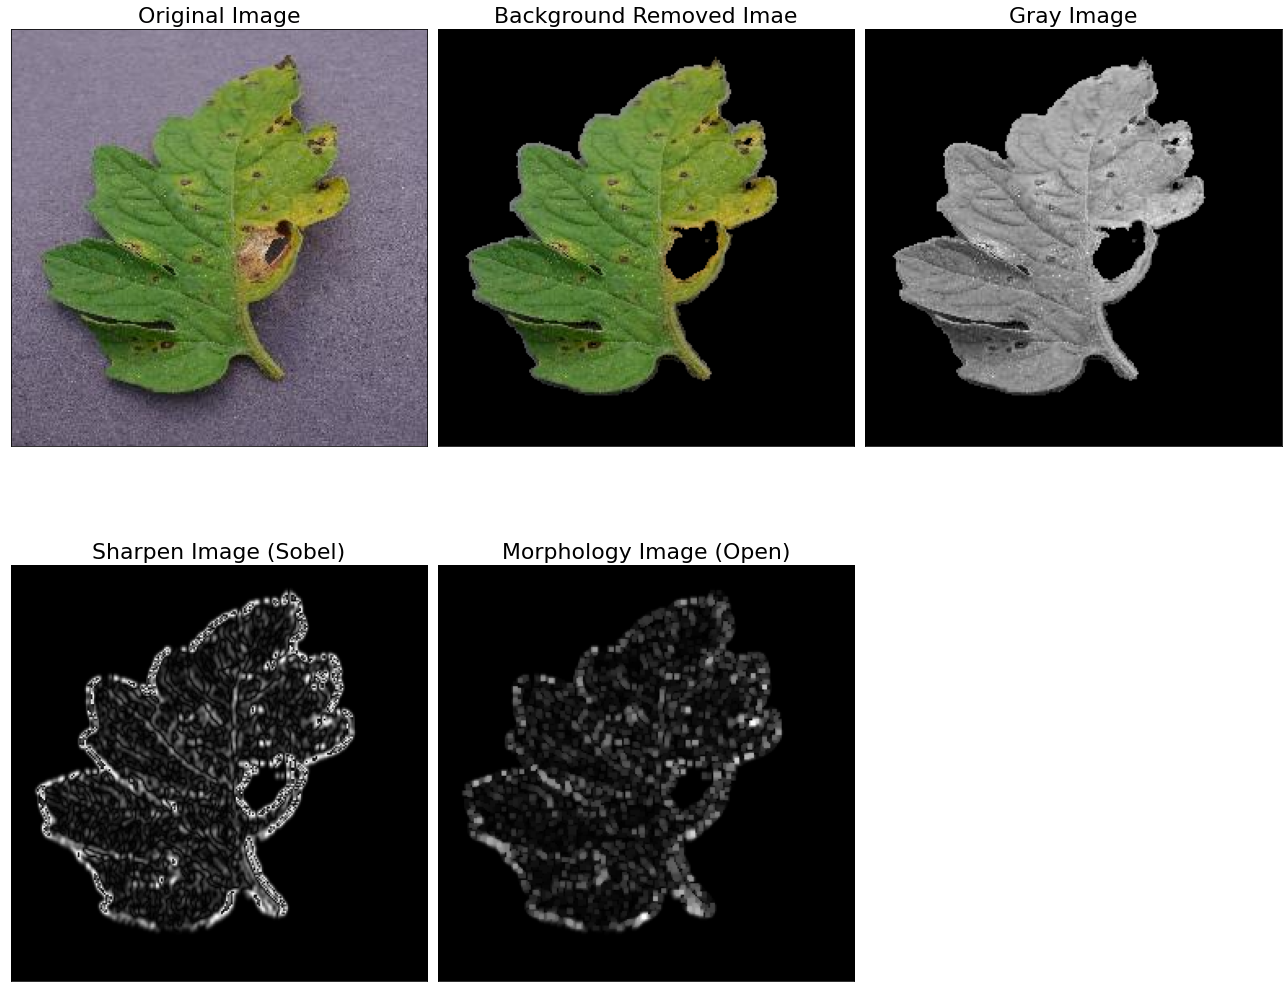

In [6]:
from image_processing import img_segmentation, sobel_edge_detection_2

image = cv2.imread("../data/plantvillage/Septoria_leaf_spot/002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG")

# Convert image to RGB and HSV
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
# => background removed image (image segmentation)
remove_background = img_segmentation(rgb_img, hsv_img)

# Convert to gray image
gray_img = cv2.cvtColor(remove_background, cv2.COLOR_RGB2GRAY)

# Sharpen Image (Sobel Filter)
sobel_img = sobel_edge_detection_2(gray_img)

# morphology image
kernel = np.ones((3,3),np.uint8)
MORPHOLOGY_IMG = cv2.morphologyEx(sobel_img, cv2.MORPH_OPEN, kernel)


fig = plt.figure(figsize=(18, 15))
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(2, 3)

# show original image
ax1.imshow(image[:, :, ::-1])
ax1.set_title("Original Image", fontsize=22)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

# show background removed image
ax2.imshow(remove_background)
ax2.set_title("Background Removed Imae", fontsize=22)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

# show gray image
ax3.imshow(gray_img, cmap="gray")
ax3.set_title("Gray Image", fontsize=22)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

# show sobel image
ax4.imshow(sobel_img, cmap="gray")
ax4.set_title("Sharpen Image (Sobel)", fontsize=22)
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

# show morphology image
ax5.imshow(MORPHOLOGY_IMG, cmap="gray")
ax5.set_title("Morphology Image (Open)", fontsize=22)
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)

ax6.set_visible(False)

fig.tight_layout()
fig.subplots_adjust(hspace=0.025, wspace=0.025)

# plt.savefig("../images/preprocessing.png")
plt.show()

### Feature Extraction and Save to File

In [4]:
import cv2
import numpy as np
from feature_extraction import fd_haralick, fd_histogram, fd_hu_moments
from image_processing import img_segmentation, sobel_edge_detection_2
image = cv2.imread("../data/plantvillage/Septoria_leaf_spot/002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG")

# Running Function Bit By Bit
RGB_BGR = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
BGR_HSV = cv2.cvtColor(RGB_BGR, cv2.COLOR_RGB2HSV)
IMG_SEGMENT = img_segmentation(RGB_BGR,BGR_HSV)

# convert to gray image
IMG_GRAY = cv2.cvtColor(IMG_SEGMENT, cv2.COLOR_RGB2GRAY)

# sharpen image
SOBEL_IMG = sobel_edge_detection_2(IMG_GRAY)

# morphology image
kernel = np.ones((3,3),np.uint8)
MORPHOLOGY_IMG = cv2.morphologyEx(SOBEL_IMG, cv2.MORPH_OPEN, kernel)

# Feature extraction
fv_hu_moments = fd_hu_moments(MORPHOLOGY_IMG)
fv_haralick   = fd_haralick(MORPHOLOGY_IMG)
fv_histogram  = fd_histogram(IMG_SEGMENT)

new_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

print(f"Hu_moments shape: {fv_hu_moments.shape}")
print(f"Haralick shape: {fv_haralick.shape}")
print(f"Histogram shape: {fv_histogram.shape}")
print(f"New_feature shape: {new_feature.shape}")

Hu_moments shape: (7,)
Haralick shape: (13,)
Histogram shape: (512,)
New_feature shape: (532,)


In [5]:
# from utils import extract_feature_to_file
# features, classes, class_name = extract_feature_to_file(data_path, feature_path, label_path)

[STATUS] Folder: Bacterial_spot: 1702it [01:13, 23.09it/s]
[STATUS] Folder: Early_blight: 800it [00:30, 26.52it/s]
[STATUS] Folder: Late_blight: 1527it [00:57, 26.65it/s]
[STATUS] Folder: Leaf_Mold: 761it [00:31, 24.26it/s]
[STATUS] Folder: Septoria_leaf_spot: 1417it [01:12, 19.56it/s]
[STATUS] Folder: Spider_mites Two-spotted_spider_mite: 1341it [00:55, 23.99it/s]
[STATUS] Folder: Target_Spot: 1123it [00:47, 23.67it/s]
[STATUS] Folder: Tomato_Yellow_Leaf_Curl_Virus: 4286it [03:01, 23.57it/s]
[STATUS] Folder: Tomato_mosaic_virus: 299it [00:10, 28.77it/s]
[STATUS] Folder: healthy: 1273it [00:51, 24.83it/s]


[STATUS] completed Feature Extraction Phase...


In [6]:
# features.shape

(14529, 13)

In [7]:
# np.savez(label_name_path, class_name)

## I. Load data Using SMOTE

In [8]:
import warnings
warnings.filterwarnings('ignore')
from utils import split_data

data = np.load(label_name_path)
label_names = data["arr_0"]

(X_train, y_train), (X_test, y_test), scaler = split_data(feature_path, label_path, is_sampling=True)

X_train.shape, X_test.shape, label_names

((34700, 13),
 (2906, 13),
 array(['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold',
        'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
        'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus',
        'Tomato_mosaic_virus', 'healthy'], dtype='<U36'))

### 1.1 Train Single Model Using SMOTE

#### 1.1.1 KNN

In [9]:
from define_model import model_classifiers
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn = model_classifiers[0][1]
knn.fit(X_train, y_train)
predicts = knn.predict(X_test)

# compute accuracy, precision, recall, f1_score
accuracy = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts, average='macro')
recall = recall_score(y_test, predicts, average='macro')
f1 = f1_score(y_test, predicts, average='macro')

print(f"A: {accuracy} | P: {precision} | R: {recall} | F1: {f1_score}")

cm = confusion_matrix(y_test, predicts, normalize="true")

A: 0.5103234686854783 | P: 0.4473793553168803 | R: 0.48172408637247727 | F1: <function f1_score at 0x7fc73367bdd0>


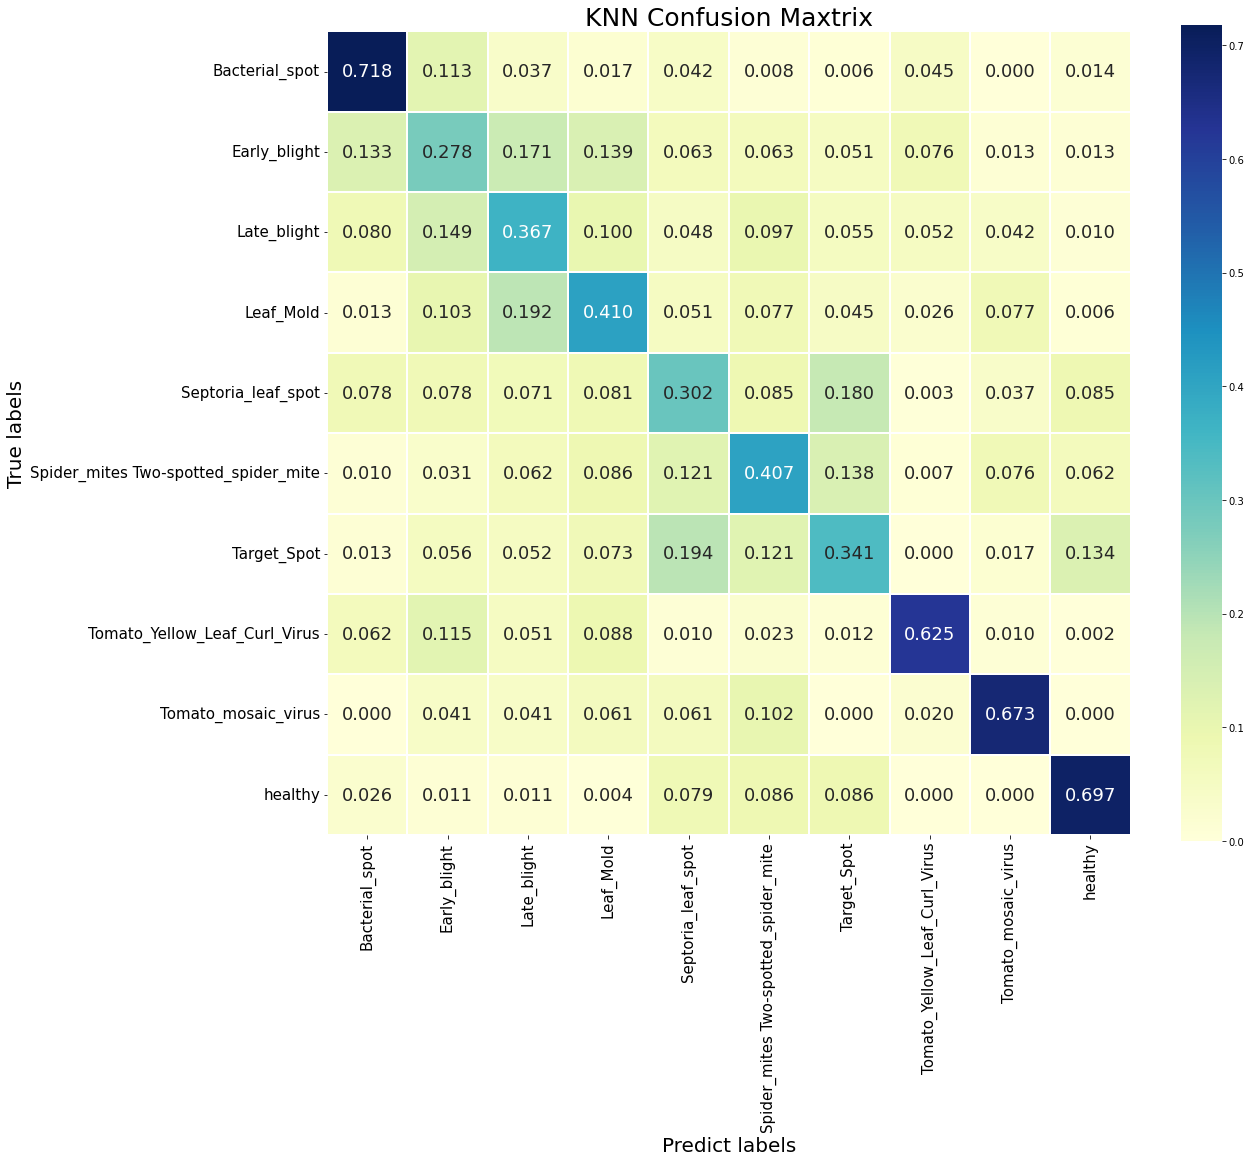

In [10]:
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.1, annot_kws={"fontsize":18}, cmap="YlGnBu", square=True)
ax.set_yticklabels(label_names, size = 15, rotation=0)
ax.set_xticklabels(label_names, size = 15, rotation=90)

ax.set_xlabel("Predict labels", size=20)
ax.set_ylabel("True labels", size=20)

ax.set_title("KNN Confusion Maxtrix", size=25)

# plt.savefig("../images/knn_cm.png")
plt.show()

#### 1.1.2. SVM: {kerne="rbf", gamma=2, C=1}

In [11]:
svc = model_classifiers[4][1]
svc.fit(X_train, y_train)
predicts = svc.predict(X_test)

# compute accuracy, precision, recall, f1_score
accuracy = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts, average='macro')
recall = recall_score(y_test, predicts, average='macro')
f1 = f1_score(y_test, predicts, average='macro')

print(f"A: {accuracy} | P: {precision} | R: {recall} | F1: {f1_score}")

cm = confusion_matrix(y_test, predicts, normalize="true")

A: 0.5612525808671713 | P: 0.512892667104963 | R: 0.5583153309170934 | F1: <function f1_score at 0x7fc73367bdd0>


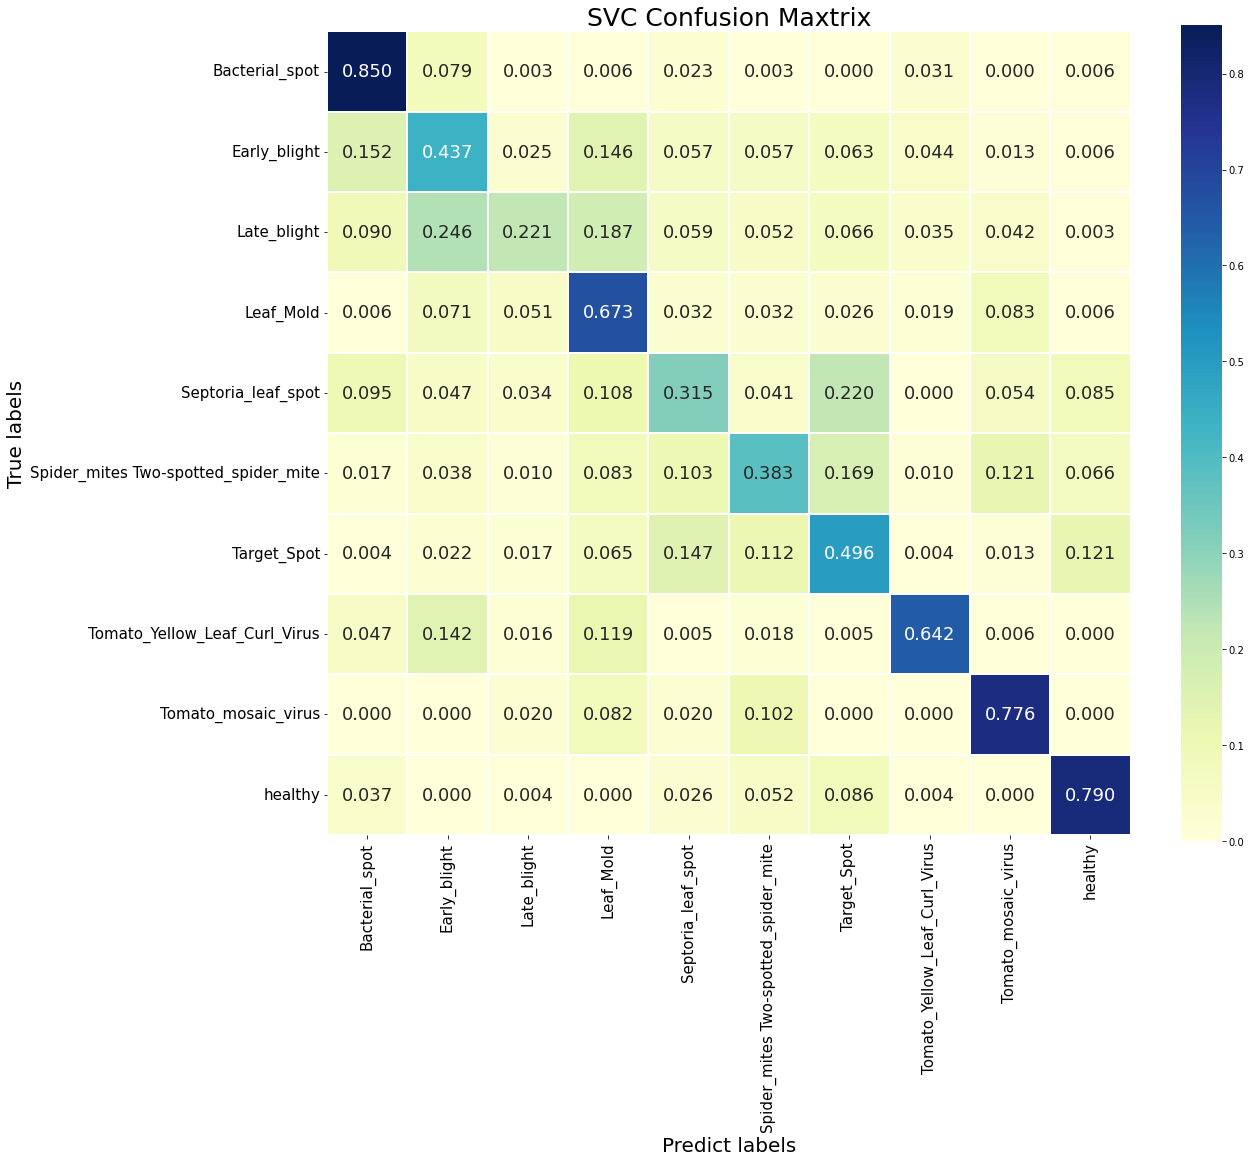

In [12]:
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.1, annot_kws={"fontsize":18}, cmap="YlGnBu", square=True)
ax.set_yticklabels(label_names, size = 15, rotation=0)
ax.set_xticklabels(label_names, size = 15, rotation=90)

ax.set_xlabel("Predict labels", size=20)
ax.set_ylabel("True labels", size=20)

ax.set_title("SVC Confusion Maxtrix", size=25)

# plt.savefig("../images/svc_cm.png")
plt.show()

#### 1.1.3. RandomForest

In [13]:
rf = model_classifiers[2][1]
rf.fit(X_train, y_train)
predicts = rf.predict(X_test)

# compute accuracy, precision, recall, f1_score
accuracy = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts, average='macro')
recall = recall_score(y_test, predicts, average='macro')
f1 = f1_score(y_test, predicts, average='macro')

print(f"A: {accuracy} | P: {precision} | R: {recall} | F1: {f1_score}")

cm = confusion_matrix(y_test, predicts, normalize="true")

A: 0.4359944941500344 | P: 0.45577631778417055 | R: 0.46147869258552465 | F1: <function f1_score at 0x7fc73367bdd0>


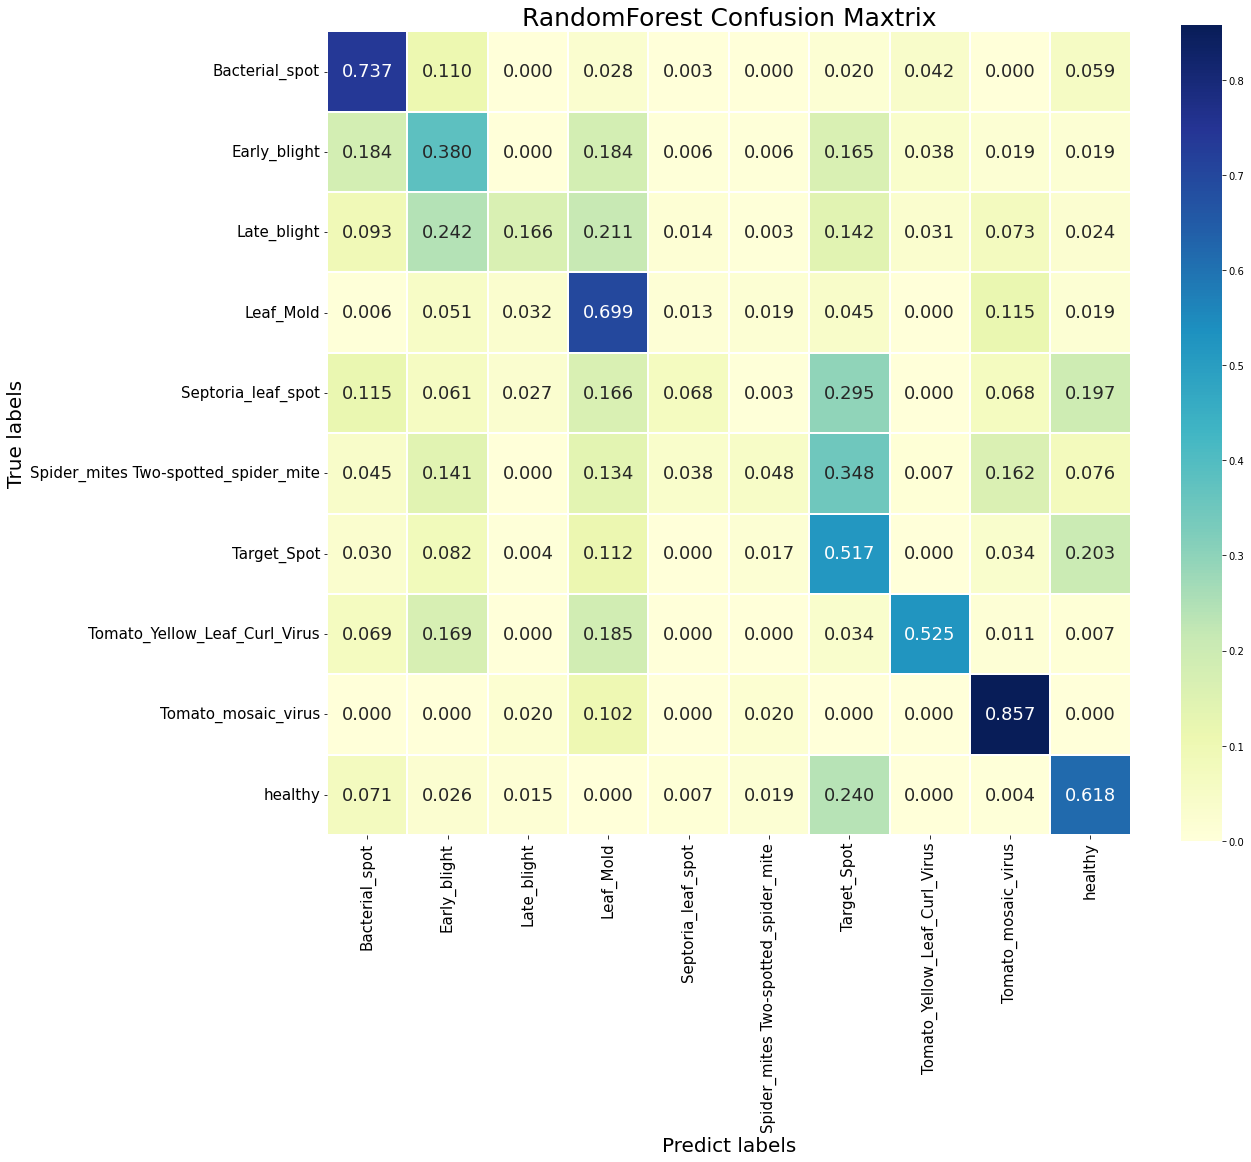

In [14]:
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.1, annot_kws={"fontsize":18}, cmap="YlGnBu", square=True)
ax.set_yticklabels(label_names, size = 15, rotation=0)
ax.set_xticklabels(label_names, size = 15, rotation=90)

ax.set_xlabel("Predict labels", size=20)
ax.set_ylabel("True labels", size=20)

ax.set_title("RandomForest Confusion Maxtrix", size=25)

# plt.savefig("../images/rf_cm.png")
plt.show()

#### 1.1.4. XGBoostClassify

In [15]:
xgb = model_classifiers[12][1]
xgb.fit(X_train, y_train)
predicts = xgb.predict(X_test)

# compute accuracy, precision, recall, f1_score
accuracy = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts, average='macro')
recall = recall_score(y_test, predicts, average='macro')
f1 = f1_score(y_test, predicts, average='macro')

print(f"A: {accuracy} | P: {precision} | R: {recall} | F1: {f1_score}")

cm = confusion_matrix(y_test, predicts, normalize="true")

A: 0.5977288368891948 | P: 0.5127124327588654 | R: 0.5452101410384181 | F1: <function f1_score at 0x7fc73367bdd0>


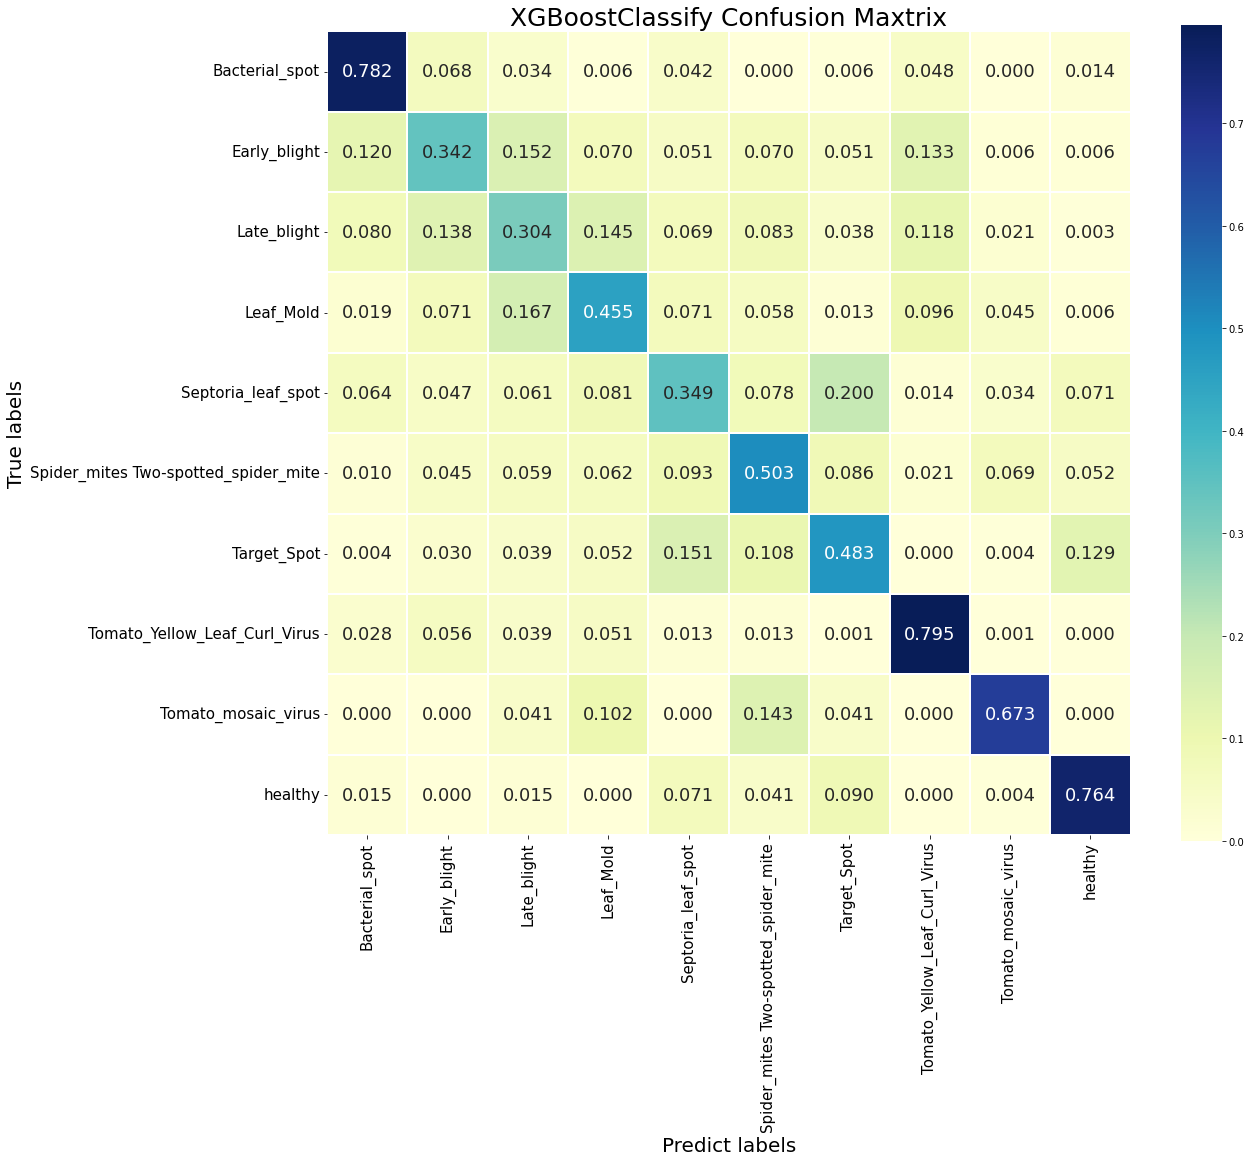

In [16]:
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.1, annot_kws={"fontsize":18}, cmap="YlGnBu", square=True)
ax.set_yticklabels(label_names, size = 15, rotation=0)
ax.set_xticklabels(label_names, size = 15, rotation=90)

ax.set_xlabel("Predict labels", size=20)
ax.set_ylabel("True labels", size=20)

ax.set_title("XGBoostClassify Confusion Maxtrix", size=25)

# plt.savefig("../images/xgb_cm.png")
plt.show()

### 1.2 Tuning Model and Choose Best Model Using SMOTE

In [17]:
import warnings
warnings.filterwarnings('ignore')

from define_model import model_classifiers
from utils import train_test_model_classification

log, _, _, best_model = train_test_model_classification(
    model_classifiers, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    report_training_smote_path, 
    best_model_smote_path
)

TRAINING PROCESSING
KNN
*******  Results  ********
Acc: 0.5103 | P: 0.4474 | R: 0.4817 | F1: 0.4511
Training time: 0.2172

Decition Tree
*******  Results  ********
Acc: 0.3878 | P: 0.4229 | R: 0.4247 | F1: 0.3269
Training time: 0.2752

Random Forest
*******  Results  ********
Acc: 0.4360 | P: 0.4558 | R: 0.4615 | F1: 0.3630
Training time: 4.0127

SVM: {linear}
*******  Results  ********
Acc: 0.3892 | P: 0.3401 | R: 0.4057 | F1: 0.3059
Training time: 40.9363

SVM: {gamma=2, C=1}
*******  Results  ********
Acc: 0.5613 | P: 0.5129 | R: 0.5583 | F1: 0.4995
Training time: 29.2088

SVM: {kernel=rbf}
*******  Results  ********
Acc: 0.5578 | P: 0.5107 | R: 0.5576 | F1: 0.4970
Training time: 29.1310

MLP
*******  Results  ********
Acc: 0.4573 | P: 0.4149 | R: 0.4526 | F1: 0.3612
Training time: 11.6040

Gaussian Naive Baye
*******  Results  ********
Acc: 0.3809 | P: 0.3455 | R: 0.3635 | F1: 0.2803
Training time: 0.0222

Linear Discriminant Analysis
*******  Results  ********
Acc: 0.5317 | P: 0.5

### 1.3 Result Using Oversampling SMOTE

In [18]:
from sklearn.metrics import confusion_matrix
import joblib

best_model = joblib.load(best_model_smote_path)
best_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=10, reg_alpha=0, ...)

In [19]:
import pandas as pd
data_df = pd.read_csv(report_training_smote_path, header=0, encoding="utf-8")
data_df.to_excel(compare_method_smote_path)

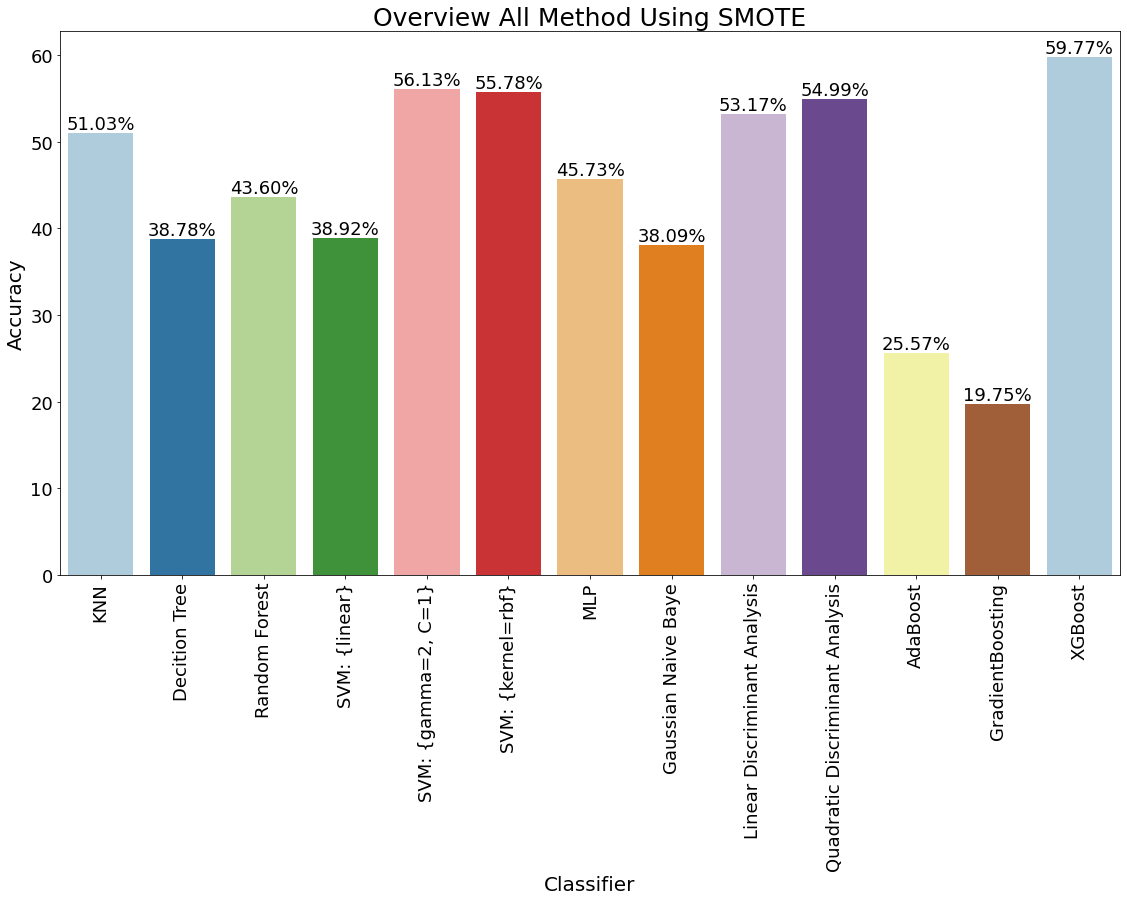

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
fig, ax= plt.subplots(figsize=(19, 10))
ax = sns.barplot(
    data=data_df, 
    x="Classifier", 
    y="Accuracy", 
    palette = 'Paired'
)

ax.set_xlabel(ax.get_xlabel(),fontsize=20)
ax.set_ylabel(ax.get_ylabel(),fontsize=20)
ax.set_title("Overview All Method Using SMOTE", fontsize=25)

value_percent = data_df["Accuracy"].values
value_percent = [f"{v:.2f}%" for v in value_percent]

for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(18)

for item in ax.get_yticklabels():
    item.set_fontsize(18)

for i in ax.containers:
    ax.bar_label(i, value_percent, fontsize=18)

plt.show()

## II. LOAD DATA Not Using SMOTE

In [35]:
import warnings
warnings.filterwarnings('ignore')
from utils import split_data

data = np.load(label_name_path)
label_names = data["arr_0"]

(X_train, y_train), (X_test, y_test), scaler = split_data(feature_path, label_path, is_sampling=False)

X_train.shape, X_test.shape, label_names

((11623, 13),
 (2906, 13),
 array(['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold',
        'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
        'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus',
        'Tomato_mosaic_virus', 'healthy'], dtype='<U36'))

### 2.1 Train Single Model Not Using SMOTE

#### 2.1.1. KNN

In [36]:
from define_model import model_classifiers
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn = model_classifiers[0][1]
knn.fit(X_train, y_train)
predicts = knn.predict(X_test)

# compute accuracy, precision, recall, f1_score
accuracy = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts, average='macro')
recall = recall_score(y_test, predicts, average='macro')
f1 = f1_score(y_test, predicts, average='macro')

print(f"A: {accuracy} | P: {precision} | R: {recall} | F1: {f1_score}")

cm = confusion_matrix(y_test, predicts, normalize="true")

A: 0.574328974535444 | P: 0.4711271036862435 | R: 0.4735636139353507 | F1: <function f1_score at 0x7fc73367bdd0>


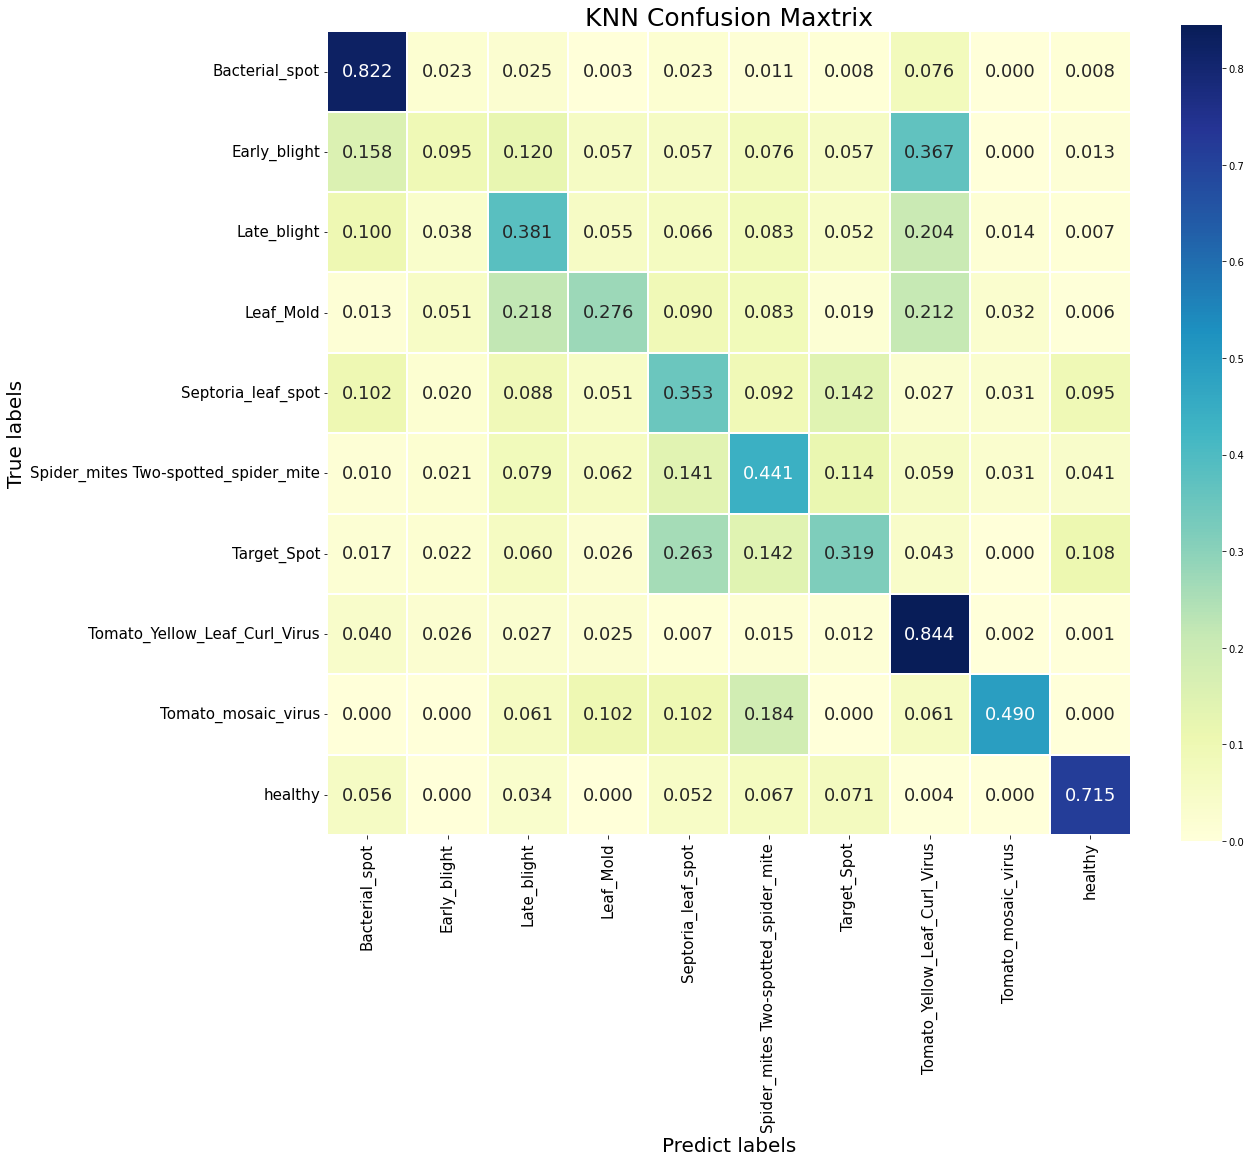

In [37]:
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.1, annot_kws={"fontsize":18}, cmap="YlGnBu", square=True)
ax.set_yticklabels(label_names, size = 15, rotation=0)
ax.set_xticklabels(label_names, size = 15, rotation=90)

ax.set_xlabel("Predict labels", size=20)
ax.set_ylabel("True labels", size=20)

ax.set_title("KNN Confusion Maxtrix", size=25)

# plt.savefig("../images/knn_cm.png")
plt.show()

#### 2.1.2. SVM: {kerne="rbf", gamma=2, C=1}

In [38]:
svc = model_classifiers[4][1]
svc.fit(X_train, y_train)
predicts = svc.predict(X_test)

# compute accuracy, precision, recall, f1_score
accuracy = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts, average='macro')
recall = recall_score(y_test, predicts, average='macro')
f1 = f1_score(y_test, predicts, average='macro')

print(f"A: {accuracy} | P: {precision} | R: {recall} | F1: {f1_score}")

cm = confusion_matrix(y_test, predicts, normalize="true")

A: 0.5849965588437716 | P: 0.4464412542182069 | R: 0.45845232043983497 | F1: <function f1_score at 0x7fc73367bdd0>


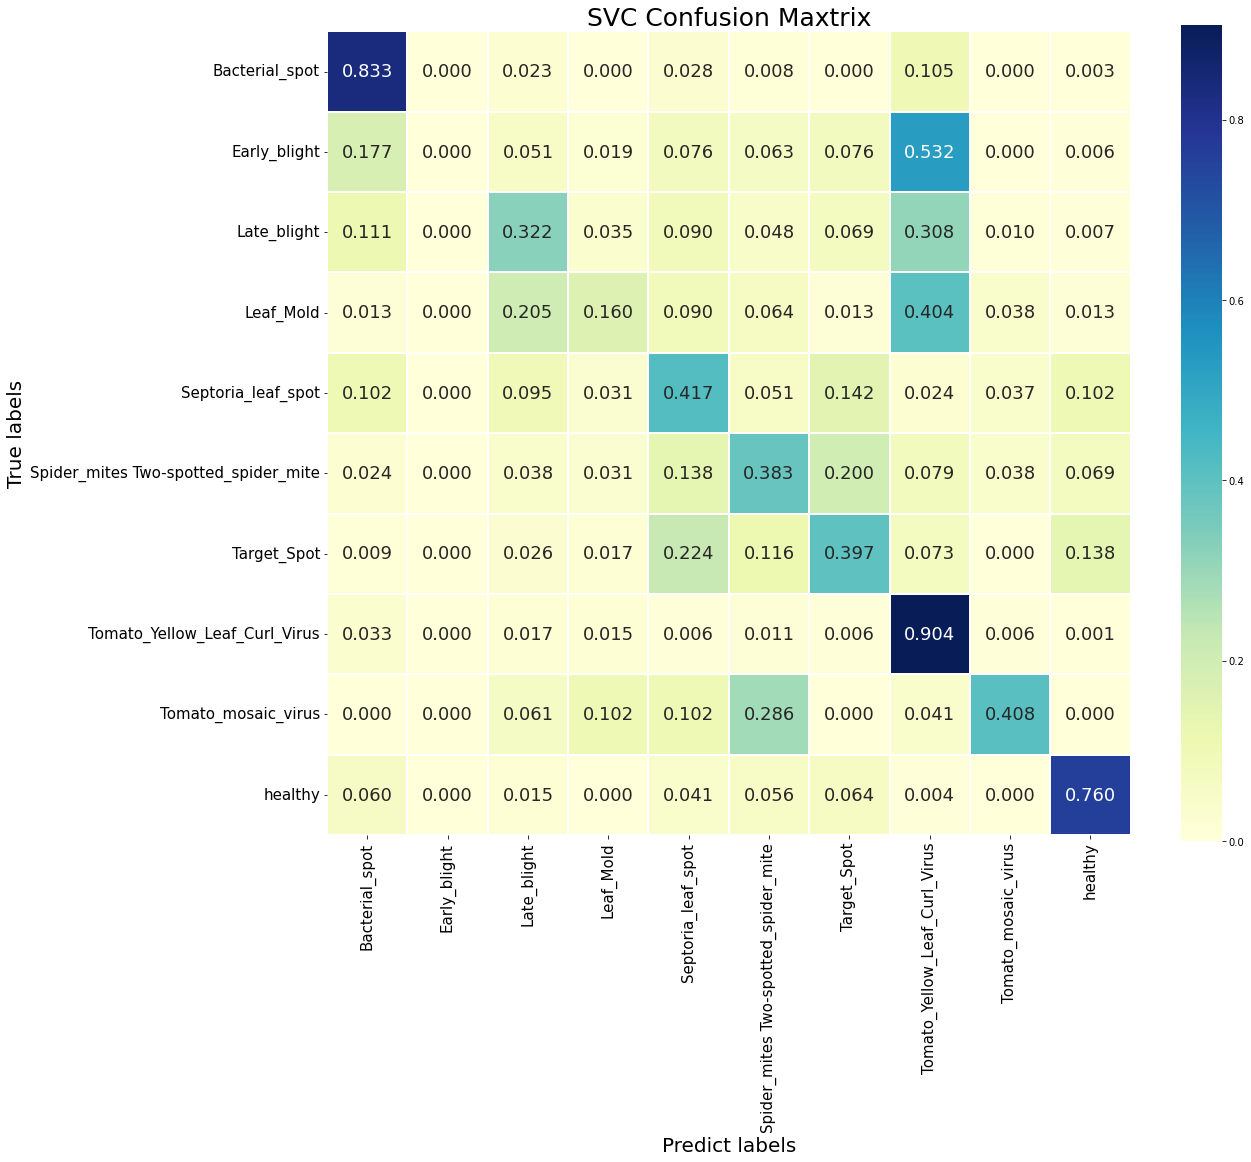

In [39]:
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.1, annot_kws={"fontsize":18}, cmap="YlGnBu", square=True)
ax.set_yticklabels(label_names, size = 15, rotation=0)
ax.set_xticklabels(label_names, size = 15, rotation=90)

ax.set_xlabel("Predict labels", size=20)
ax.set_ylabel("True labels", size=20)

ax.set_title("SVC Confusion Maxtrix", size=25)

# plt.savefig("../images/svc_cm.png")
plt.show()

#### 2.1.3. RandomForest

In [40]:
rf = model_classifiers[2][1]
rf.fit(X_train, y_train)
predicts = rf.predict(X_test)

# compute accuracy, precision, recall, f1_score
accuracy = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts, average='macro')
recall = recall_score(y_test, predicts, average='macro')
f1 = f1_score(y_test, predicts, average='macro')

print(f"A: {accuracy} | P: {precision} | R: {recall} | F1: {f1_score}")

cm = confusion_matrix(y_test, predicts, normalize="true")

A: 0.5089470061940812 | P: 0.3922899627208116 | R: 0.36606725480115426 | F1: <function f1_score at 0x7fc73367bdd0>


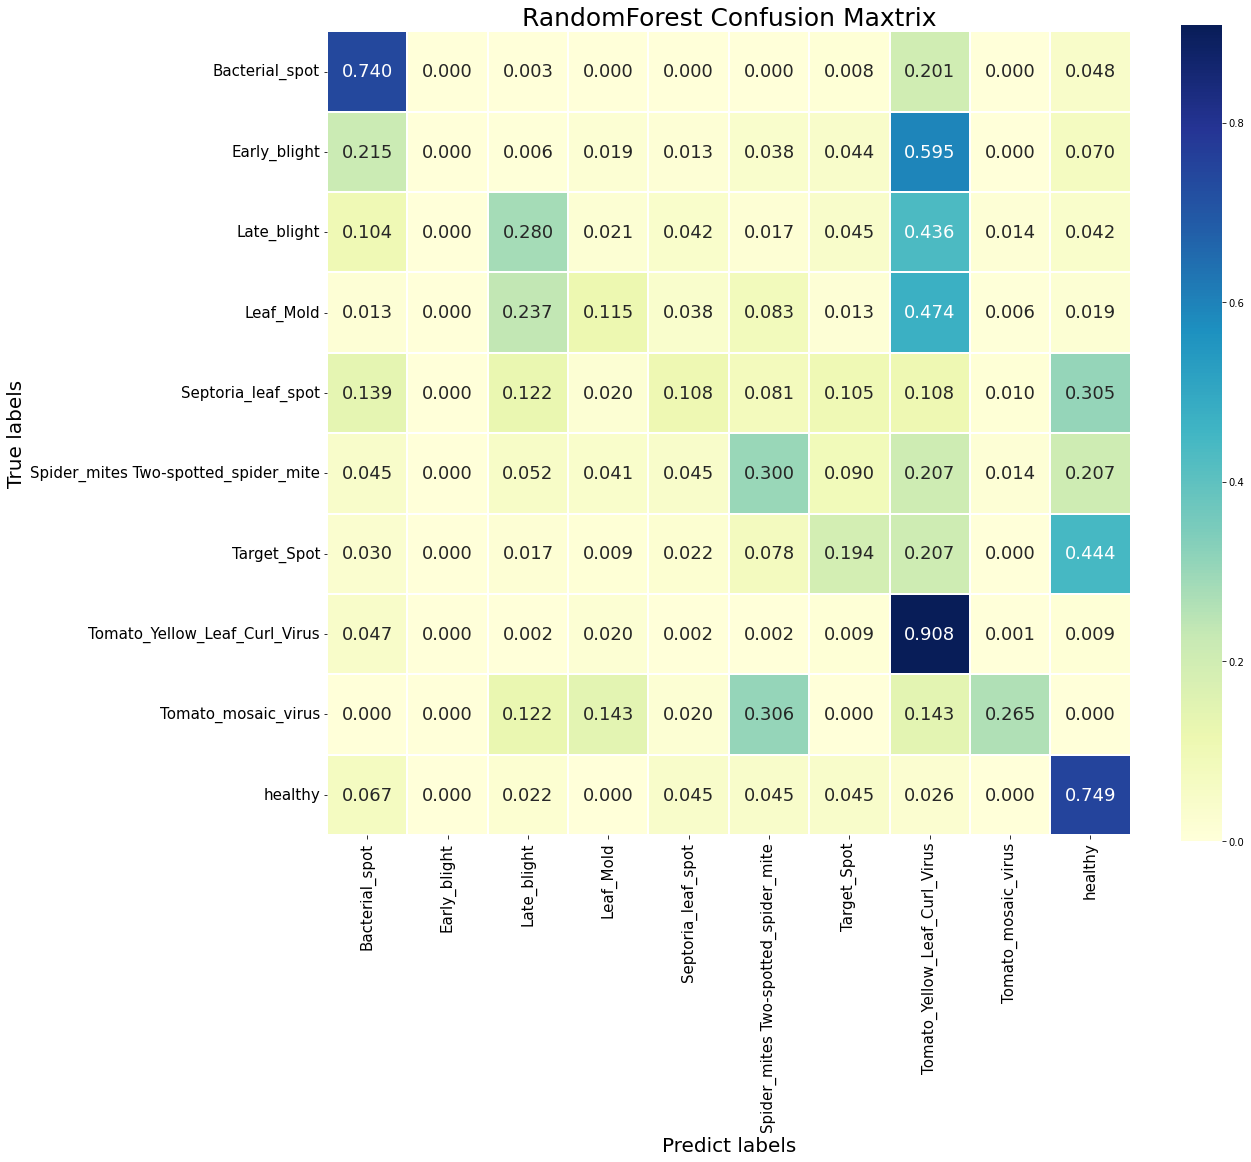

In [41]:
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.1, annot_kws={"fontsize":18}, cmap="YlGnBu", square=True)
ax.set_yticklabels(label_names, size = 15, rotation=0)
ax.set_xticklabels(label_names, size = 15, rotation=90)

ax.set_xlabel("Predict labels", size=20)
ax.set_ylabel("True labels", size=20)

ax.set_title("RandomForest Confusion Maxtrix", size=25)

# plt.savefig("../images/rf_cm.png")
plt.show()

#### 2.1.4. XGBoostClassify

In [42]:
xgb = model_classifiers[12][1]
xgb.fit(X_train, y_train)
predicts = xgb.predict(X_test)

# compute accuracy, precision, recall, f1_score
accuracy = accuracy_score(y_test, predicts)
precision = precision_score(y_test, predicts, average='macro')
recall = recall_score(y_test, predicts, average='macro')
f1 = f1_score(y_test, predicts, average='macro')

print(f"A: {accuracy} | P: {precision} | R: {recall} | F1: {f1_score}")

cm = confusion_matrix(y_test, predicts, normalize="true")

A: 0.6097728836889195 | P: 0.510478053123878 | R: 0.5045125262579144 | F1: <function f1_score at 0x7fc73367bdd0>


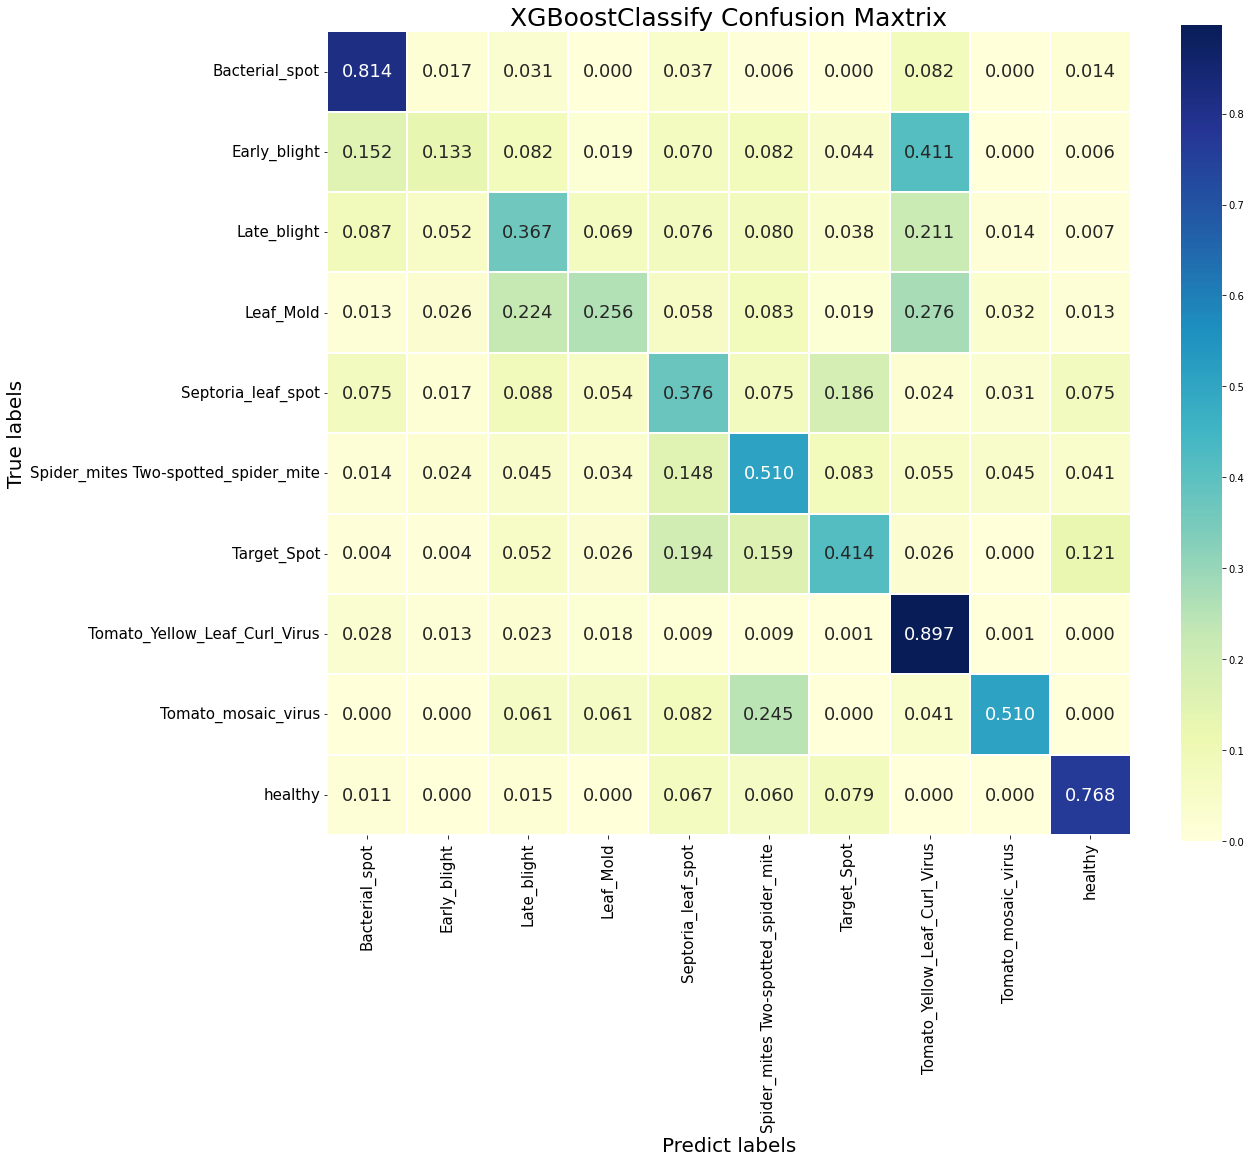

In [43]:
fig, ax = plt.subplots(figsize=(18, 15))
ax = sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.1, annot_kws={"fontsize":18}, cmap="YlGnBu", square=True)
ax.set_yticklabels(label_names, size = 15, rotation=0)
ax.set_xticklabels(label_names, size = 15, rotation=90)

ax.set_xlabel("Predict labels", size=20)
ax.set_ylabel("True labels", size=20)

ax.set_title("XGBoostClassify Confusion Maxtrix", size=25)

# plt.savefig("../images/xgb_cm.png")
plt.show()

### 2.2 Tuning Model and Choose Best Model NOT Using SMOTE

In [44]:
import warnings
warnings.filterwarnings('ignore')

from define_model import model_classifiers
from utils import train_test_model_classification

log, _, _, best_model = train_test_model_classification(
    model_classifiers, 
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    report_training_not_smote_path, 
    best_model_not_smote_path
)

TRAINING PROCESSING
KNN
*******  Results  ********
Acc: 0.5743 | P: 0.4711 | R: 0.4736 | F1: 0.4694
Training time: 0.1351

Decition Tree
*******  Results  ********
Acc: 0.4763 | P: 0.3254 | R: 0.3137 | F1: 0.2786
Training time: 0.0797

Random Forest
*******  Results  ********
Acc: 0.5089 | P: 0.3923 | R: 0.3661 | F1: 0.3509
Training time: 1.2541

SVM: {linear}
*******  Results  ********
Acc: 0.3782 | P: 0.1455 | R: 0.1973 | F1: 0.1459
Training time: 5.4923

SVM: {gamma=2, C=1}
*******  Results  ********
Acc: 0.5850 | P: 0.4464 | R: 0.4585 | F1: 0.4454
Training time: 4.5780

SVM: {kernel=rbf}
*******  Results  ********
Acc: 0.5785 | P: 0.4392 | R: 0.4525 | F1: 0.4385
Training time: 5.2560

MLP
*******  Results  ********
Acc: 0.5041 | P: 0.2938 | R: 0.3320 | F1: 0.2897
Training time: 4.0448

Gaussian Naive Baye
*******  Results  ********
Acc: 0.3854 | P: 0.3381 | R: 0.3584 | F1: 0.2783
Training time: 0.0163

Linear Discriminant Analysis
*******  Results  ********
Acc: 0.5902 | P: 0.5046 

### 2.3 Result Using Oversampling SMOTE

In [48]:
from sklearn.metrics import confusion_matrix
import joblib

best_model = joblib.load(best_model_not_smote_path)
best_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=10, reg_alpha=0, ...)

In [49]:
import pandas as pd
data_df = pd.read_csv(report_training_not_smote_path, header=0, encoding="utf-8")
data_df.to_excel(compare_method_not_smote_path)

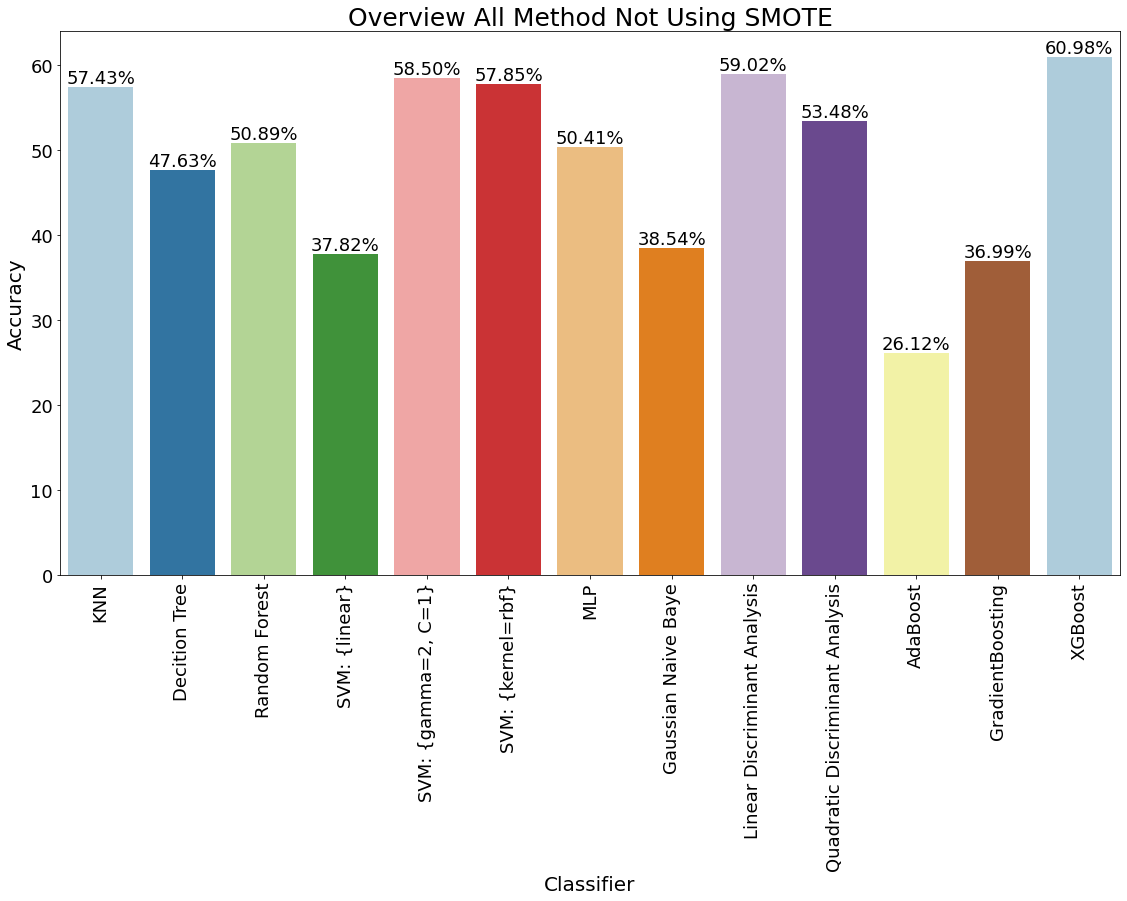

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
fig, ax= plt.subplots(figsize=(19, 10))
ax = sns.barplot(
    data=data_df, 
    x="Classifier", 
    y="Accuracy", 
    palette = 'Paired'
)

ax.set_xlabel(ax.get_xlabel(),fontsize=20)
ax.set_ylabel(ax.get_ylabel(),fontsize=20)
ax.set_title("Overview All Method Not Using SMOTE", fontsize=25)

value_percent = data_df["Accuracy"].values
value_percent = [f"{v:.2f}%" for v in value_percent]

for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(18)

for item in ax.get_yticklabels():
    item.set_fontsize(18)

for i in ax.containers:
    ax.bar_label(i, value_percent, fontsize=18)

plt.show()